## Analysing Cycling Statistics in Urban Areas


### Project Report for Data Literacy 2022/2023 

by Adhiraj Ghosh, Ralf Krueger and Ignacio Cobas


### Introduction

Why is everyone cycling around the city all of a sudden? Is it safe in large urban areas? In this notebook, we aim to understand how cycling trends have developed in cities. 

We use New York City as a reference to understand how cyclists have increased with time, due to the availability of the detailed [Citi Bike Dataset](https://www.nyc.gov/html/dot/html/bicyclists/bikestats.shtml). The city of New York also makes available statistics of cyclists being killed or seriously injured, which is available [here](https://www.nyc.gov/html/dot/html/bicyclists/bikestats.shtml). Our main analysis involves understanding the relation between increasing number of cyclists and bike trips in the city and the number of injuries or fatalities.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
import seaborn as sns
from scipy.stats import poisson
from data_loading import *
from utils import *
from plots import *
from model import *

#### Loading and Visualising the Data

We have curated the Citi Bike Dataset and extracted the relevant information and incoprated external information such as the precint ID, which helps us map injuries. We have also painstakingly collated Killed or Seriously Injured(KSI) data from 2014 to 2019 from government reports for the respective years. We convert the data to csv in create_ksi_data.ipynb. We also use geomapping information of the police precincts, from [here](https://github.com/ResidentMario/geoplot-data/blob/master/nyc-police-precincts.geojson). All our curated data is available [here](https://drive.google.com/drive/folders/1wYelRx4-nxsdOw3e6L2PQVRKVkxVElkN).

##### Note: in most plots, we maintain the x axis as precincts. This refers to the number of the various precincts in New York City, as a subdivision of each of the five Boroughs of the city. They range from 1 to 123. However, our data is available for 77 out of the 123 precincts.

In [2]:
precinct_data = load_precinct_data()
df = load_final_dataframe()
df_nonzero = df.loc[df.precinct.isin(df.precinct.unique()[df.groupby(['precinct']).sum().bike_count > 1])]


D:\tubingen\Sem1\Data Literacy\Project\city-biking\data_loading.py:114: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ksi = ksi.groupby(['precinct', 'year']).sum()


In [3]:
df_nonzero = df_nonzero.reset_index()

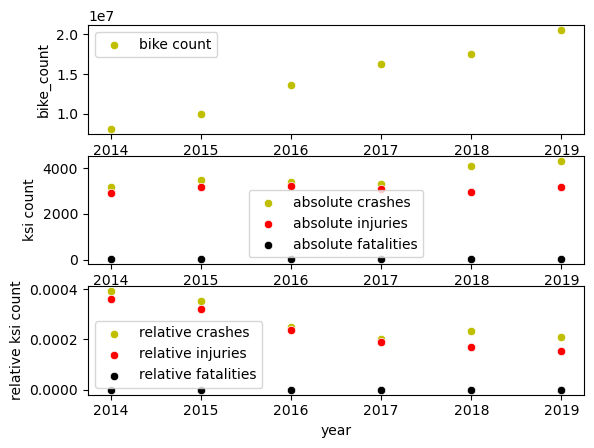

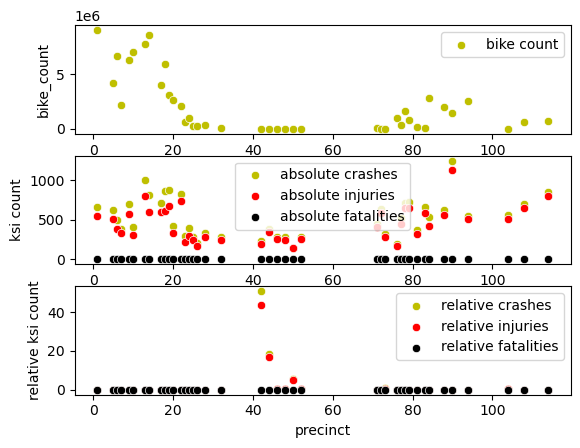

In [4]:
plot_overview(df_nonzero, 'year')
plot_overview(df_nonzero, 'precinct')

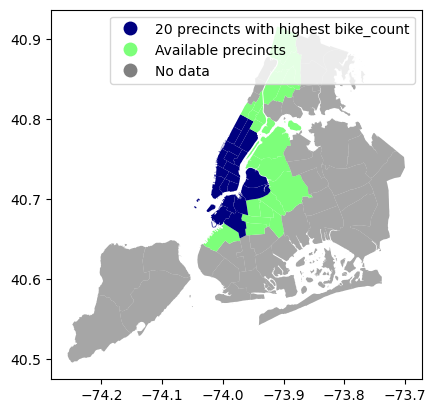

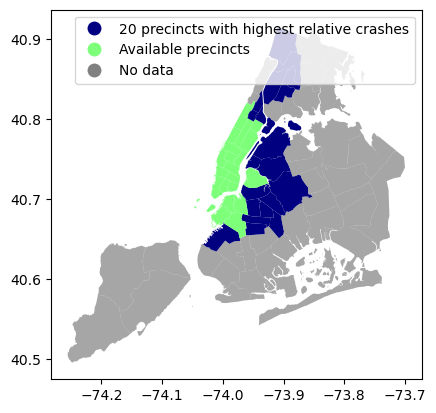

In [5]:
plot_nlargest_nyc(df_nonzero, precinct_data,'bike_count', 20)
plot_nlargest_nyc(df_nonzero, precinct_data,'crashes', 20, True)

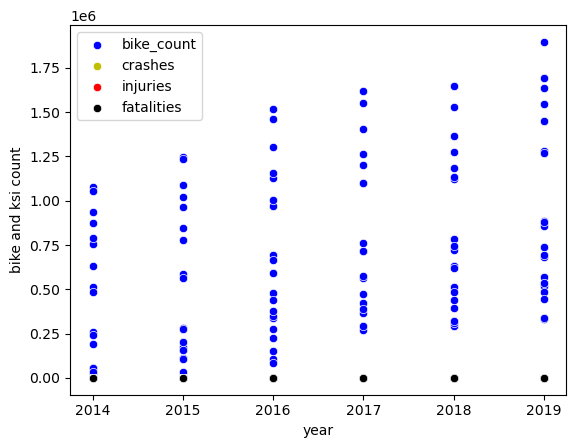

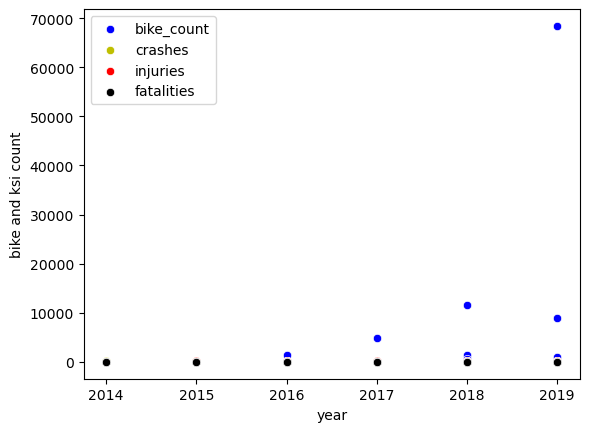

In [6]:
plot_nlargest(df_nonzero, 'bike_count', 20)
plot_nlargest(df_nonzero, 'crashes', 10, True)

#### The model
We use a Poisson regression model for counting future injuries. We consider data from 2014-2018 for each precinct as training data and predict for 2019. We also co

Training data set length=385
Testing data set length=77
                 Generalized Linear Model Regression Results                  
Dep. Variable:               injuries   No. Observations:                  385
Model:                            GLM   Df Residuals:                      381
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1757.1
Date:                Fri, 27 Jan 2023   Deviance:                       1293.9
Time:                        22:46:17   Pearson chi2:                 1.18e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

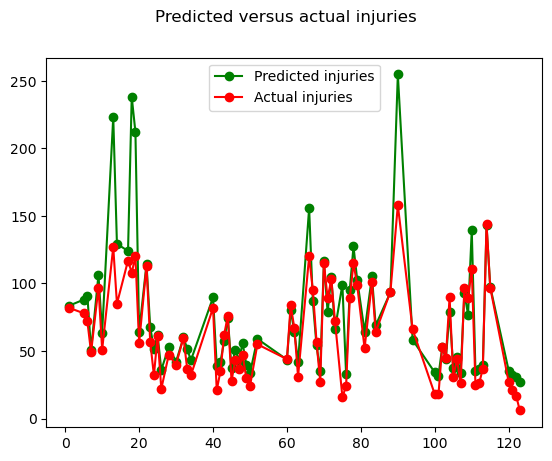

<Figure size 640x480 with 0 Axes>

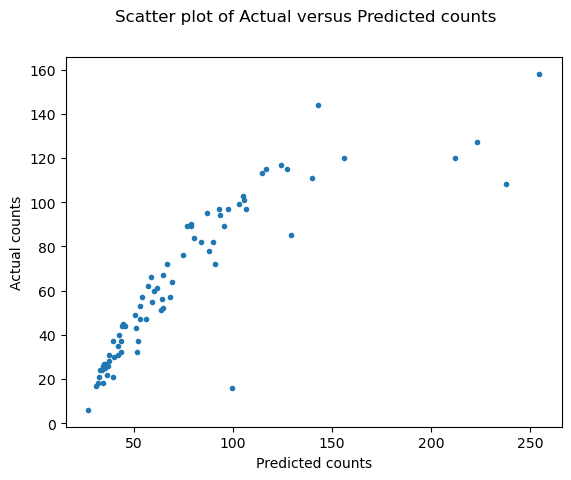

28.079297778078537

In [7]:
#Whole dataset
X_train, y_train, X_test, y_test = train_test_set_year(df)
predictions_summary_frame = poisson_train_predict(X_train, y_train, X_test)
rms = pred_analysis(predictions_summary_frame,X_test, y_test)
rms

Training data set length=205
Testing data set length=41
                 Generalized Linear Model Regression Results                  
Dep. Variable:               injuries   No. Observations:                  205
Model:                            GLM   Df Residuals:                      201
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -878.27
Date:                Fri, 27 Jan 2023   Deviance:                       521.24
Time:                        22:46:17   Pearson chi2:                     494.
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

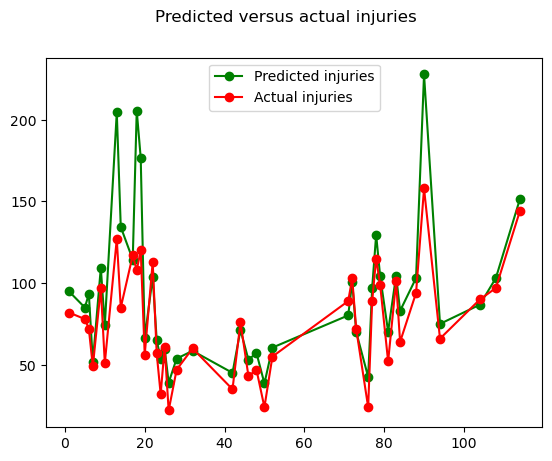

<Figure size 640x480 with 0 Axes>

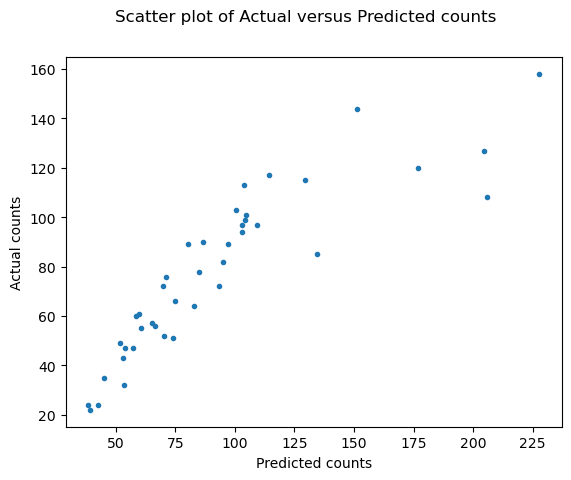

27.408213454764674

In [8]:
#NONZERO ALL
X_train, y_train, X_test, y_test = train_test_set_year(df_nonzero)
predictions_summary_frame = poisson_train_predict(X_train, y_train, X_test)
rms = pred_analysis(predictions_summary_frame, X_test, y_test)
rms

Training data set length=205
Testing data set length=41


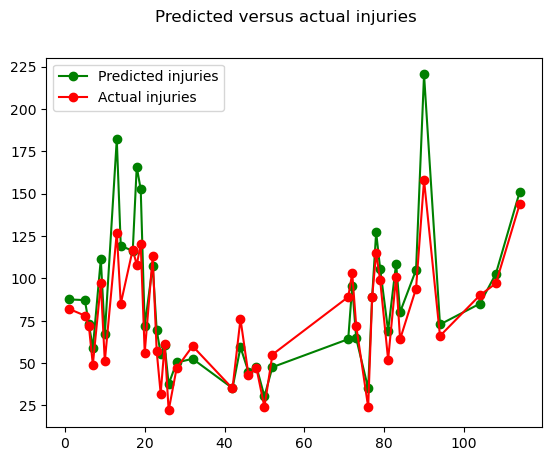

<Figure size 640x480 with 0 Axes>

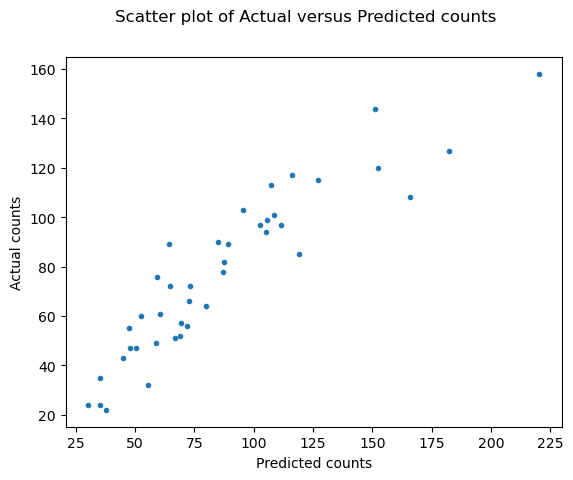

20.231389152407974

In [9]:
#NONZERO EACH PRECINCT
X_train, y_train, X_test, y_test = train_test_set_year(df_nonzero)
pred_df, rms = train_pred_individual(X_train, y_train, X_test,y_test)
rms

Training data set length=192
Testing data set length=54
                 Generalized Linear Model Regression Results                  
Dep. Variable:               injuries   No. Observations:                  192
Model:                            GLM   Df Residuals:                      188
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -873.89
Date:                Fri, 27 Jan 2023   Deviance:                       608.10
Time:                        22:46:18   Pearson chi2:                     582.
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

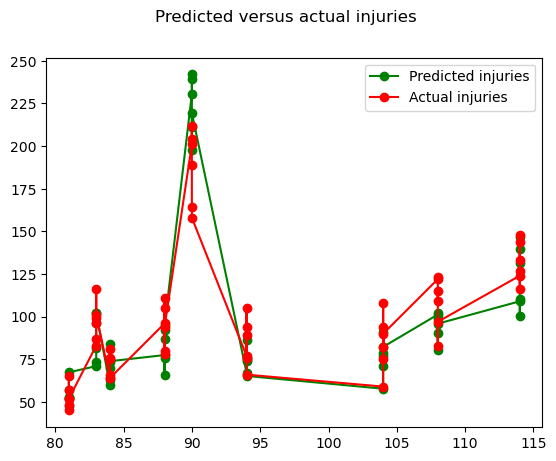

<Figure size 640x480 with 0 Axes>

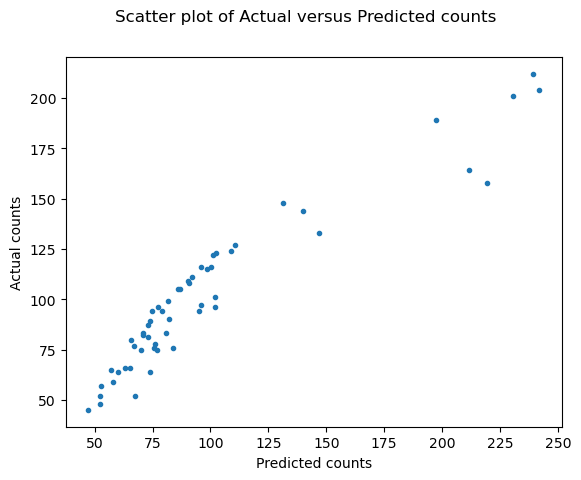

In [10]:
#UNSEEN TEST ALL
X_train, y_train, X_test, y_test = train_test_zeroshot(df_nonzero)
predictions_summary_frame = poisson_train_predict(X_train, y_train, X_test)
pred_analysis(predictions_summary_frame, X_test, y_test, if_rms=False)

Training data set length=192
Testing data set length=54


D:\Anaconda\envs\death_by_cycle\lib\site-packages\statsmodels\genmod\families\links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
D:\Anaconda\envs\death_by_cycle\lib\site-packages\statsmodels\genmod\families\links.py:575: RuntimeWarning: overflow encountered in exp
  return np.exp(z)


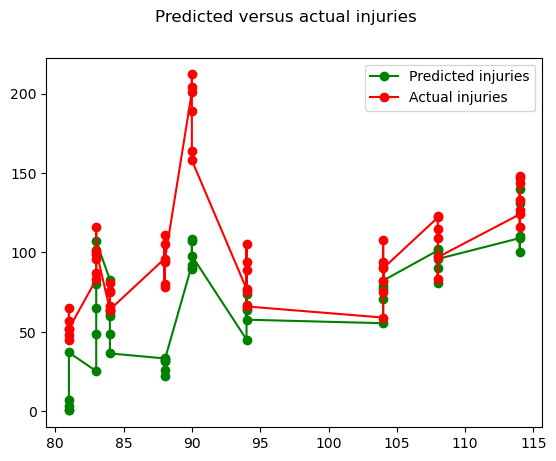

<Figure size 640x480 with 0 Axes>

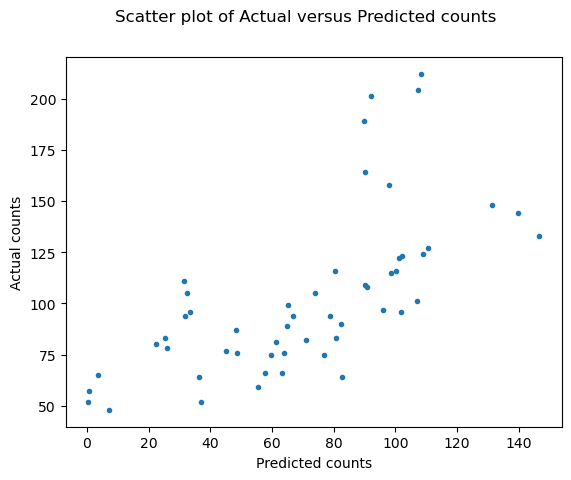

In [11]:
#UNSEEN TEST INDIVIDUAL
X_train, y_train, X_test, y_test = train_test_zeroshot(df_nonzero)
pred_df= train_pred_individual(X_train, y_train, X_test,y_test, if_rms=False)